In [2]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\user\anaconda3\lib\site-packages (0.0)


In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [4]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
X = df.drop("koi_disposition", axis=1)
feature_names = X.columns
y = df["koi_disposition"]
print(X.shape, y.shape)

(6991, 40) (6991,)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
4002,0,0,1,0,99.673478,3.463000e-04,-3.463000e-04,219.334830,0.002300,-0.002300,...,-148,4.777,0.040,-0.027,0.492,0.026,-0.027,293.05801,45.248821,15.801
4246,0,1,0,0,0.592244,9.000000e-08,-9.000000e-08,131.654831,0.000124,-0.000124,...,-146,4.664,0.056,-0.032,0.591,0.045,-0.045,290.28094,45.464260,15.653
548,0,1,1,0,9.991625,5.360000e-06,-5.360000e-06,137.447816,0.000445,-0.000445,...,-176,4.338,0.153,-0.187,1.096,0.309,-0.206,301.04239,45.022888,14.039
3953,0,1,0,0,178.412990,3.100000e-05,-3.100000e-05,218.225235,0.000127,-0.000127,...,-134,4.346,0.084,-0.126,1.148,0.202,-0.124,288.32785,38.627621,13.944
2362,0,0,0,0,45.294223,5.600000e-05,-5.600000e-05,138.678725,0.000987,-0.000987,...,-68,4.347,0.030,-0.030,1.044,0.057,-0.042,285.67938,50.241299,10.961


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [11]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.796
k: 3, Train/Test Score: 0.896/0.810
k: 5, Train/Test Score: 0.873/0.825
k: 7, Train/Test Score: 0.869/0.819
k: 9, Train/Test Score: 0.857/0.820
k: 11, Train/Test Score: 0.850/0.820
k: 13, Train/Test Score: 0.849/0.817
k: 15, Train/Test Score: 0.846/0.817
k: 17, Train/Test Score: 0.842/0.814
k: 19, Train/Test Score: 0.838/0.816


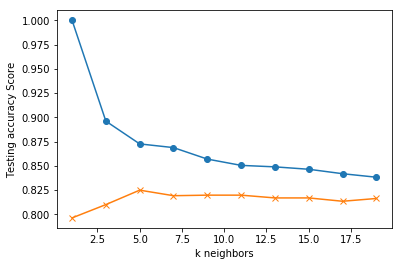

In [12]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Training Data Score Acc: %.3f' % knn.score(X_train_scaled, y_train))

k=5 Training Data Score Acc: 0.873


In [20]:
knn.fit(X_test_scaled, y_test)
print('k=5 Testing Data Score Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Testing Data Score Acc: 0.858
